In [2]:
# Import base libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import glob
from PIL import Image
import re
import seaborn as sns

# Import TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
# Import the data from the main file(s)
file_path = "C:/Users/colts/OneDrive/Desktop/COMP 4449/Multi-class Weather Dataset"
folders = os.listdir(file_path)
ext = ['jpg','jpeg']

# Folders for modeling
print(folders)

# Collect images and their respective labels
def CollectImages(PATH, folder, image_ext):
    images = []
    for ext in image_ext:
        for file in glob.glob(PATH + "/" + folder + '/*.' + ext):
            # Using Pillow to reshape and convert the images
            images.append(file)

    # Displays number of images in each folder
    print(f"Number of Images in folder {folder}: {len(images)}")
    
    # Shuffles for randomness
    np.random.shuffle(images)
    
    # Returns the list of images along with an index of values that changes each run
    return images, np.array([folder for i in range(len(images))])

['Cloudy', 'Hail', 'Lightning', 'Rain', 'Shine', 'Snow', 'Sunrise']


In [5]:
# Convert the images into numpy arrays
image_h = 224
image_w = 224

fields = len(folders)
train_ds = tf.keras.utils.image_dataset_from_directory(
    file_path,
    validation_split=0.2,
    subset="training",
    seed=12345,
    image_size=(image_w, image_h),
    batch_size=64)

val_ds = tf.keras.utils.image_dataset_from_directory(
    file_path,
    validation_split=0.2,
    subset="validation",
    seed=12345,
    image_size=(image_w, image_h),
    batch_size=64)

Found 2245 files belonging to 7 classes.
Using 1796 files for training.
Found 2245 files belonging to 7 classes.
Using 449 files for validation.


In [6]:
# Create the model
weather_model = keras.models.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(image_w, image_h, 3)),
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(fields)])

# Call the 'compile' method
weather_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam', # Try several
              metrics=['accuracy'])

weather_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [7]:
# Train and Validate the model using the training data
epochs=15
history_1 = weather_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/15
29/29 [==============================] - 7s 95ms/step - loss: 1.5261 - accuracy: 0.4638 - val_loss: 1.0741 - val_accuracy: 0.5702
Epoch 2/15
29/29 [==============================] - 3s 88ms/step - loss: 0.7985 - accuracy: 0.7210 - val_loss: 0.7527 - val_accuracy: 0.7394
Epoch 3/15
29/29 [==============================] - 3s 86ms/step - loss: 0.6185 - accuracy: 0.7912 - val_loss: 0.7106 - val_accuracy: 0.7617
Epoch 4/15
29/29 [==============================] - 3s 88ms/step - loss: 0.4845 - accuracy: 0.8307 - val_loss: 0.7022 - val_accuracy: 0.7639
Epoch 5/15
29/29 [==============================] - 3s 88ms/step - loss: 0.3583 - accuracy: 0.8803 - val_loss: 0.5649 - val_accuracy: 0.8062
Epoch 6/15
29/29 [==============================] - 3s 91ms/step - loss: 0.2424 - accuracy: 0.9304 - val_loss: 0.5476 - val_accuracy: 0.8218
Epoch 7/15
29/29 [==============================] - 3s 94ms/step - loss: 0.1835 - accuracy: 0.9477 - val_loss: 0.6789 - val_accuracy: 0.7929
Epoch 8/15
29

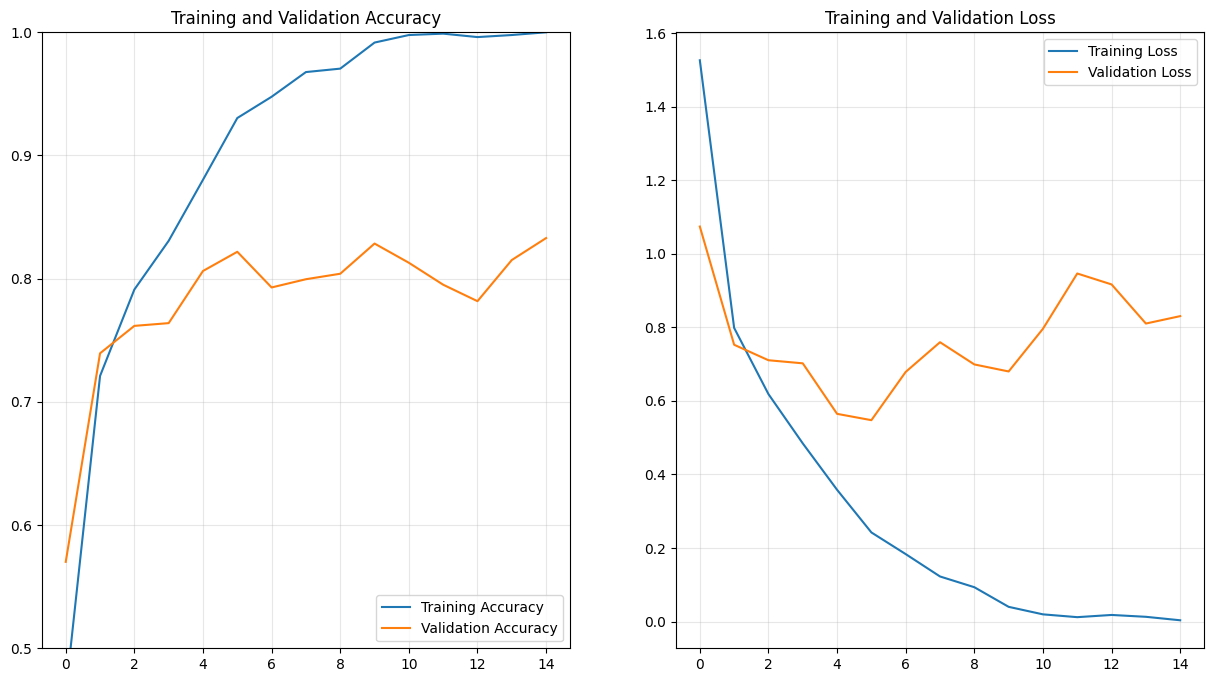

In [9]:
# Plots depicting second models accuracy/loss
training_acc = history_1.history['accuracy']
validation_acc = history_1.history['val_accuracy']

training_loss = history_1.history['loss']
validation_loss = history_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_acc, label='Training Accuracy')
plt.plot(epochs_range, validation_acc, label='Validation Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(alpha=0.3)
plt.show()

#### Saving and Testing the 5-Layer CNN      Model

In [8]:
# Save the model for future use
# keras.models.save_model(weather_model, "BaseCNN_WX.h5")